In [5]:
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np


#https://blog.csdn.net/weixin_35732969/article/details/81239172 
# 预处理数据
def loadData(filename):
    dataSet = []
    fr = open(filename)
    for line in fr.readlines():
        curLine = line.strip().split(' ')
        fltLine = list(map(float, curLine))
        dataSet.append(fltLine)
    return dataSet
 

In [8]:
x=map(lambda x,y:x+y, [1, 2], [1, 2])
print(x)

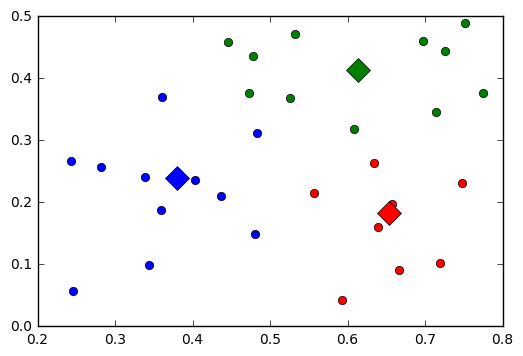

In [12]:


def test_GMM(dataMat, components=3,cov_type="full"):
    clst = mixture.GMM(n_components=n_components,covariance_type=cov_type)
    clst.fit(dataMat)
    predicted_labels =clst.predict(dataMat)
    return clst.means_,predicted_labels     # clst.means_返回均值
def showCluster(dataMat, k, centroids, clusterAssment):
    numSamples, dim = dataMat.shape
    if dim != 2:
        print("Sorry! I can not draw because the dimension of your data is not 2!")
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Sorry! Your k is too large!")
        return 1

        # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i])
        plt.plot(dataMat[i, 0], dataMat[i, 1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)

    plt.show()


if __name__=="__main__":
    dataMat = np.mat(loadData('watermelon4.txt'))
    n_components = 3
#  iter=100
    cov_types = ['spherical', 'tied', 'diag', 'full']
    centroids,labels = test_GMM(dataMat,n_components,cov_types[3])
    showCluster(dataMat, n_components, centroids, labels)  # 这里labels维度改变了，注意修改showCluster方

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[ 1.          0.99999787]
 [ 1.          0.99999998]
 [ 1.          0.99934633]
 [ 1.          0.97750401]
 [ 2.          0.53614749]
 [ 0.          0.9758896 ]
 [ 2.          0.6293604 ]
 [ 0.          0.79551425]
 [ 1.          0.99999507]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          0.99999615]
 [ 1.          0.99986769]
 [ 1.          0.99996254]
 [ 0.          0.99581211]
 [ 1.          0.99843098]
 [ 1.          0.99999978]
 [ 0.          0.99988441]
 [ 0.          0.99997522]
 [ 0.          0.99999999]
 [ 1.          0.99999988]
 [ 1.          0.99999894]
 [ 2.          0.91053058]
 [ 2.          0.98222592]
 [ 2.          0.97777788]
 [ 1.          0.99999997]
 [ 2.          0.99409233]
 [ 2.          0.94574013]
 [ 1.          0.99999969]
 [ 2.          0.95820909]]


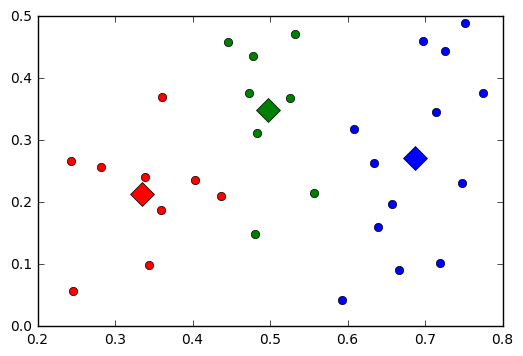

In [13]:
 import numpy as np
    
 import matplotlib.pyplot as plt

 # 预处理数据
 def loadData(filename):
     dataSet = []
     fr = open(filename)
     for line in fr.readlines():
         curLine = line.strip().split(' ')
         fltLine = list(map(float, curLine))
         dataSet.append(fltLine)
     return dataSet

 # 高斯分布的概率密度函数
 def prob(x, mu, sigma):
     n = np.shape(x)[1]
     expOn = float(-0.5 * (x - mu) * (sigma.I) * ((x - mu).T))
     divBy = pow(2 * np.pi, n / 2) * pow(np.linalg.det(sigma), 0.5)  # np.linalg.det 计算矩阵的行列式
     return pow(np.e, expOn) / divBy

 # EM算法
 def EM(dataMat, maxIter=50):
     m, n = np.shape(dataMat)
     # 1.初始化各高斯混合成分参数
     alpha = [1 / 3, 1 / 3, 1 / 3]   # 1.1初始化 alpha1=alpha2=alpha3=1/3
     mu = [dataMat[5, :], dataMat[21, :], dataMat[26, :]] # 1.2初始化 mu1=x6,mu2=x22,mu3=x27
     sigma = [np.mat([[0.1, 0], [0, 0.1]]) for x in range(3)]    # 1.3初始化协方差矩阵
     gamma = np.mat(np.zeros((m, 3)))
     for i in range(maxIter):
         for j in range(m):
             sumAlphaMulP = 0
             for k in range(3):
                 gamma[j, k] = alpha[k] * prob(dataMat[j, :], mu[k], sigma[k]) # 4.计算混合成分生成的后验概率，即gamma
                 sumAlphaMulP += gamma[j, k]
             for k in range(3):
                 gamma[j, k] /= sumAlphaMulP
         sumGamma = np.sum(gamma, axis=0)

         for k in range(3):
             mu[k] = np.mat(np.zeros((1, n)))
             sigma[k] = np.mat(np.zeros((n, n)))
             for j in range(m):
                 mu[k] += gamma[j, k] * dataMat[j, :]
             mu[k] /= sumGamma[0, k] #  7.计算新均值向量
             for j in range(m):
                 sigma[k] += gamma[j, k] * (dataMat[j, :] - mu[k]).T *(dataMat[j, :] - mu[k])
             sigma[k] /= sumGamma[0, k]  # 8. 计算新的协方差矩阵
             alpha[k] = sumGamma[0, k] / m   # 9. 计算新混合系数
             # print(mu)
     return gamma


 # init centroids with random samples
 def initCentroids(dataMat, k):
     numSamples, dim = dataMat.shape
     centroids = np.zeros((k, dim))
     for i in range(k):
         index = int(np.random.uniform(0, numSamples))
         centroids[i, :] = dataMat[index, :]
     return centroids


 def gaussianCluster(dataMat):
     m, n = np.shape(dataMat)
     centroids = initCentroids(dataMat, m)  ## step 1: init centroids
     clusterAssign = np.mat(np.zeros((m, 2)))
     gamma = EM(dataMat)
     for i in range(m):
         # amx返回矩阵最大值，argmax返回矩阵最大值所在下标
         clusterAssign[i, :] = np.argmax(gamma[i, :]), np.amax(gamma[i, :])  # 15.确定x的簇标记lambda
         ## step 4: update centroids
     for j in range(m):
         pointsInCluster = dataMat[np.nonzero(clusterAssign[:, 0].A == j)[0]]
         centroids[j, :] = np.mean(pointsInCluster, axis=0)  # 计算出均值向量
     return centroids, clusterAssign


 def showCluster(dataMat, k, centroids, clusterAssment):
     numSamples, dim = dataMat.shape
     if dim != 2:
         print("Sorry! I can not draw because the dimension of your data is not 2!")
         return 1

     mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
     if k > len(mark):
         print("Sorry! Your k is too large!")
         return 1

         # draw all samples
     for i in range(numSamples):
         markIndex = int(clusterAssment[i, 0])
         plt.plot(dataMat[i, 0], dataMat[i, 1], mark[markIndex])

     mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
     # draw the centroids
     for i in range(k):
         plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)

     plt.show()

 if __name__=="__main__":
     dataMat = np.mat(loadData('watermelon4.txt'))
     centroids, clusterAssign = gaussianCluster(dataMat)
     print(clusterAssign)
     showCluster(dataMat, 3, centroids, clusterAssign)